In [153]:
from langgraph.graph import StateGraph, START , END
from typing import TypedDict, Literal


In [154]:
class  Quadstate(TypedDict):
    a: float
    b: float
    c: float
    discriminant: float
    equation : str
    result : str 

In [155]:
def show_equation(state : Quadstate) -> Quadstate:
    equation= f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"
    return {"equation": equation}

def calculate_discriminant(state : Quadstate) -> Quadstate:
    discriminant = state['b']**2 - 4*state['a']*state['c']
    return {"discriminant": discriminant}


def real_roots(state : Quadstate) :
    root1 = (-state['b'] + state["discriminant"]**0.5) / (2*state['a'])
    root2 = (-state['b'] - state["discriminant"]**0.5) / (2*state['a'])
    result = f"Two real roots: x1 = {root1}, x2 = {root2}"
    return {"result": result}


def repeted_roots(state : Quadstate) -> Quadstate:
    root = -state['b'] / (2*state['a'])
    result = f"One real repeated root: x = {root}"
    return {"result": result}

def No_roots(state : Quadstate) -> Quadstate:
    result = "No real roots"
    return {"result": result}

In [156]:
def check_conditions(state:Quadstate)-> Literal["real_roots","repeted_roots","No_roots"]:
    if state["discriminant"] > 0:
        return "real_roots"
    elif state["discriminant"] == 0:
        return "repeted_roots"
    else:
        return "No_roots"

In [157]:
graph = StateGraph(Quadstate)

graph.add_node("show_equation",show_equation )
graph.add_node("calculate_discriminant", calculate_discriminant)  
graph.add_node("real_roots", real_roots)
graph.add_node("repeted_roots",repeted_roots)
graph.add_node("No_roots", No_roots)

In [158]:
graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "calculate_discriminant")
graph.add_conditional_edges("calculate_discriminant", check_conditions)
graph.add_edge("real_roots", END)
graph.add_edge("repeted_roots", END)
graph.add_edge("No_roots", END)

In [159]:
workflow=graph.compile()

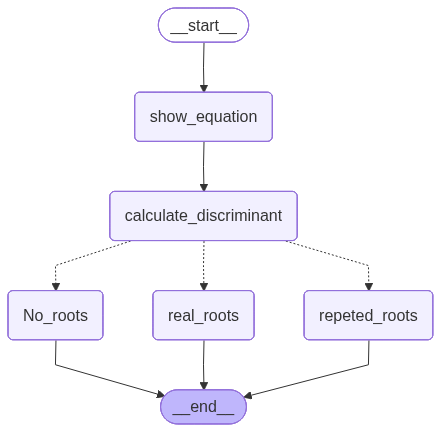

In [160]:
workflow

In [161]:
initial_state = {"a": 1, "b": -2, "c": 1}

In [162]:
workflow.invoke(initial_state)

{'a': 1,
 'b': -2,
 'c': 1,
 'discriminant': 0,
 'equation': '1x^2 + -2x + 1 = 0',
 'result': 'One real repeated root: x = 1.0'}